In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

# Define folder path and image names
folder_path = r'C:\Users\hp\Desktop\Week 1'
image_name = 'Cave.jpg'
image2_name = 'Garnacho.jpg'

# Load the image
image_path = os.path.join(folder_path, image_name)
image = cv2.imread(image_path)

# Check image loading
if image is None:
    print(f'Failed to load image: {image_path}')
else:
    print(f'Loaded image successfully: {image_path}')

Loaded image successfully: C:\Users\hp\Desktop\Week 1\Cave.jpg


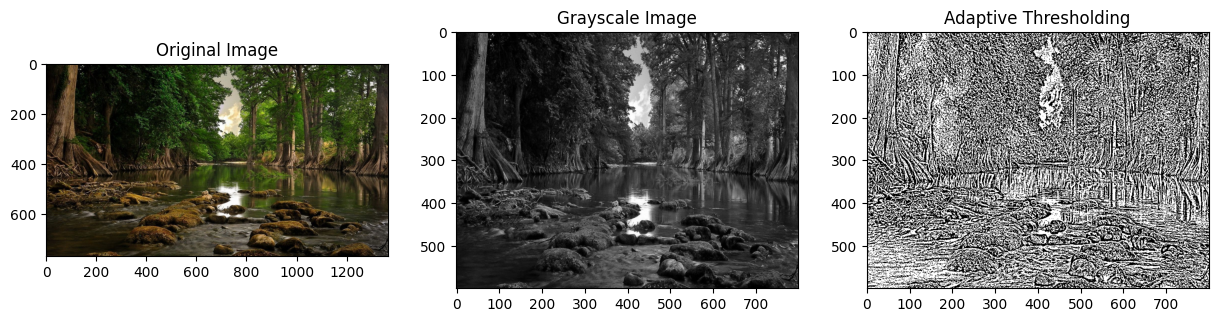

In [10]:
# Resize the image
resized_image = cv2.resize(image, (800, 600))

# Convert to grayscale
gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display original and processed images
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')

plt.show()

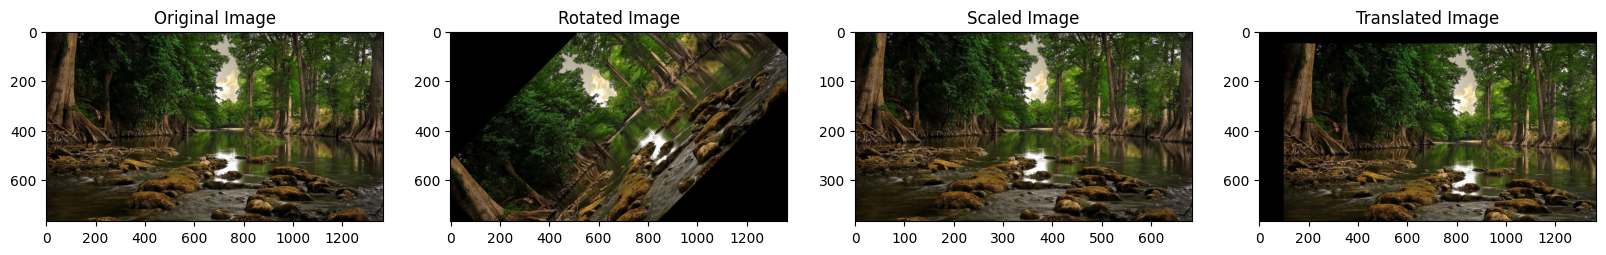

In [11]:
# Define transformation functions

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated = cv2.warpAffine(image, M, (cols, rows))
    return rotated

def scale_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    scaled = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return scaled

def translate_image(image, x, y):
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, x], [0, 1, y]])
    translated = cv2.warpAffine(image, M, (cols, rows))
    return translated

# Apply transformations
rotated_image = rotate_image(image, 45)
scaled_image = scale_image(image, 50)
translated_image = translate_image(image, 100, 50)

# Display transformed images
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title('Scaled Image')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')

plt.show()

In [12]:
# Calculate Field of View (FoV)
def calculate_fov(sensor_size, focal_length):
    return 2 * np.arctan(sensor_size / (2 * focal_length)) * (180 / np.pi)

# Example parameters
sensor_size = 35  # mm
focal_length = 50  # mm

# Compute and print FoV
fov = calculate_fov(sensor_size, focal_length)
print(f"Field of View: {fov:.2f} degrees")

Field of View: 38.58 degrees


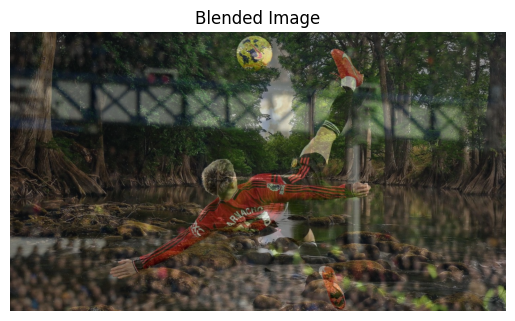

In [13]:
# Image blending function
def blend_images(image1, image2, alpha):
    blended = cv2.addWeighted(image1, alpha, image2, 1 - alpha, 0)
    return blended

# Load second image
image2_path = os.path.join(folder_path, image2_name)
image2 = cv2.imread(image2_path)

if image2 is not None:
    image2_resized = cv2.resize(image2, (image.shape[1], image.shape[0]))
    blended_image = blend_images(image, image2_resized, 0.5)
    plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
    plt.title('Blended Image')
    plt.axis('off')
    plt.show()
else:
    print(f'Failed to load second image: {image2_path}')